# Self-Driving Car Engineer Nanodegree


### Advanced Lane Finding Project By Abdelkoddous Khamsi

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [37]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
N = len(images)

print(images)
print(type(images))
print("Number of images ==>", N)

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(1000)
    else:
        print("No corners found in ", fname)

cv2.destroyAllWindows()

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']
<class 'list'>
Number of images ==> 20
No corners found in  camera_cal\calibration1.jpg
No corners found in  camera_cal\calibration4.jpg
No corners found in  camera_cal\calibration5.jpg


objpoints array len 17
imgpoints array len 17


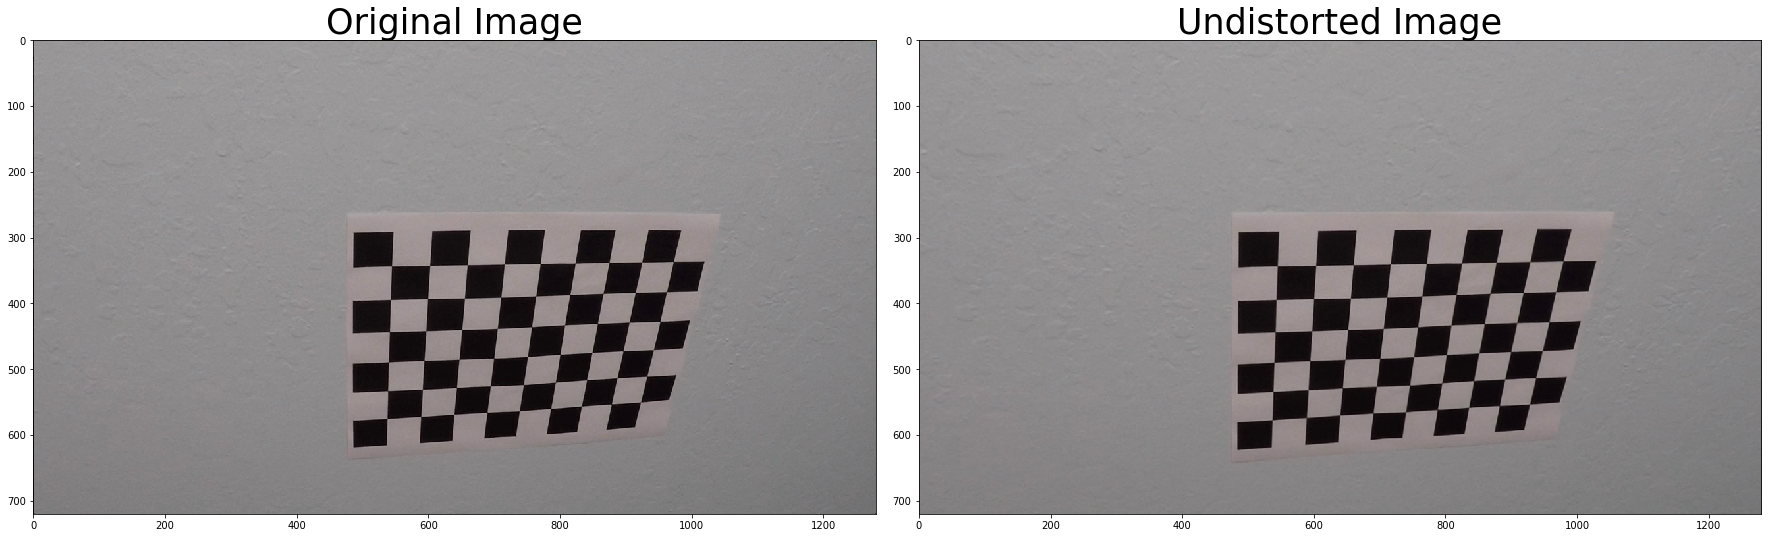

In [46]:
## Camera calibration given
%matplotlib inline

def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    cam_calib = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:-1], None, None)
    undist = cv2.undistort(img, cam_calib[1], cam_calib[2])
    return undist

def PlotComparisonView(image_before, image_after, performedProcessing):
    """
    To avoid repeting ploting commands every time, will be useful throughout
    this notebook 
    """

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image_before)
    ax1.set_title('Original Image', fontsize=35)
    ax2.imshow(image_after)
    ax2.set_title(performedProcessing + ' Image', fontsize=35)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

img = cv2.imread(images[1])

print("objpoints array len", len( objpoints))
print("imgpoints array len", len( imgpoints))

undistorted_img = cal_undistort(img, objpoints, imgpoints)

PlotComparisonView(img, undistorted_img, 'Undistorted')

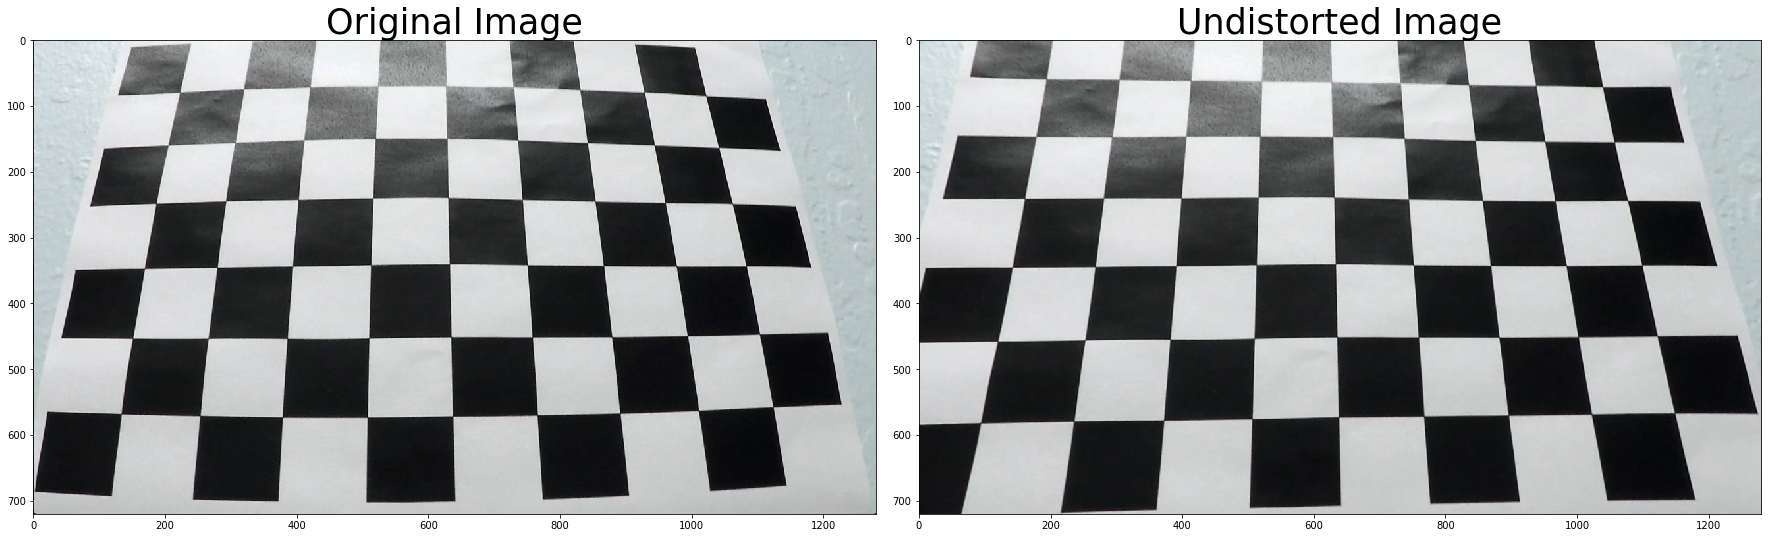

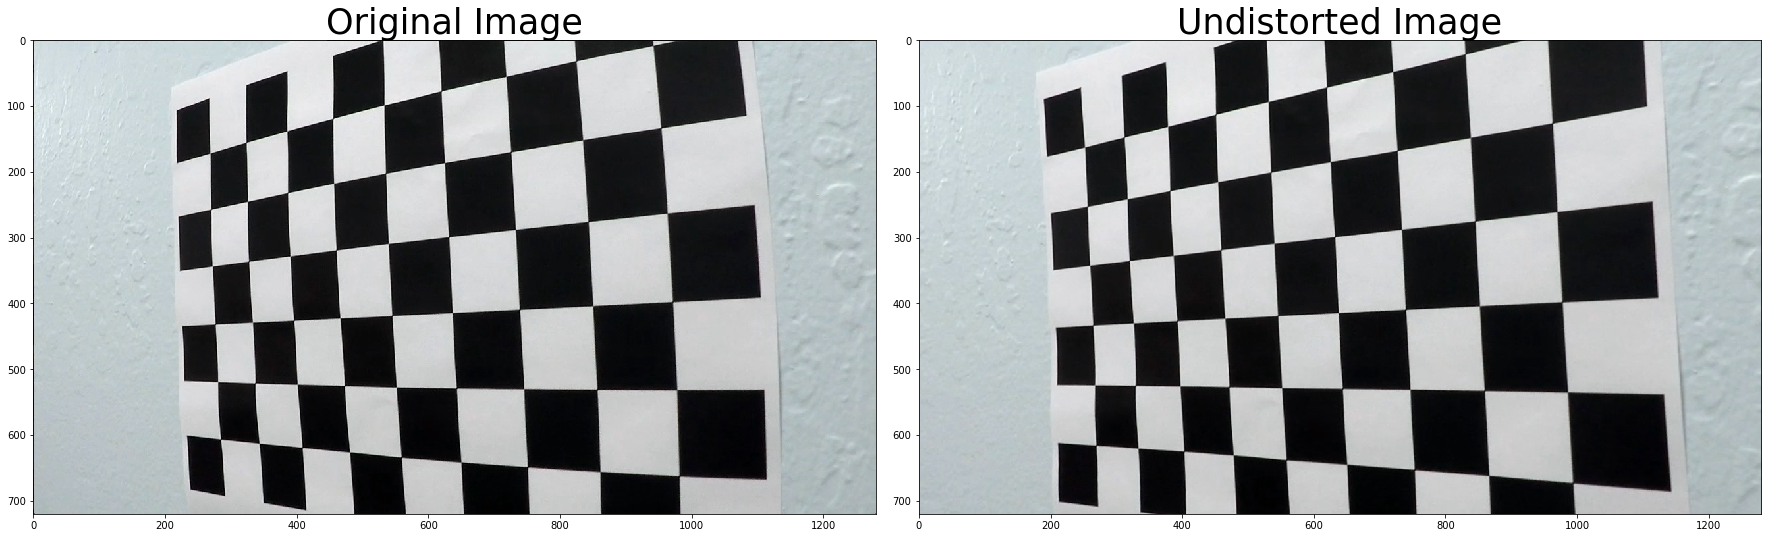

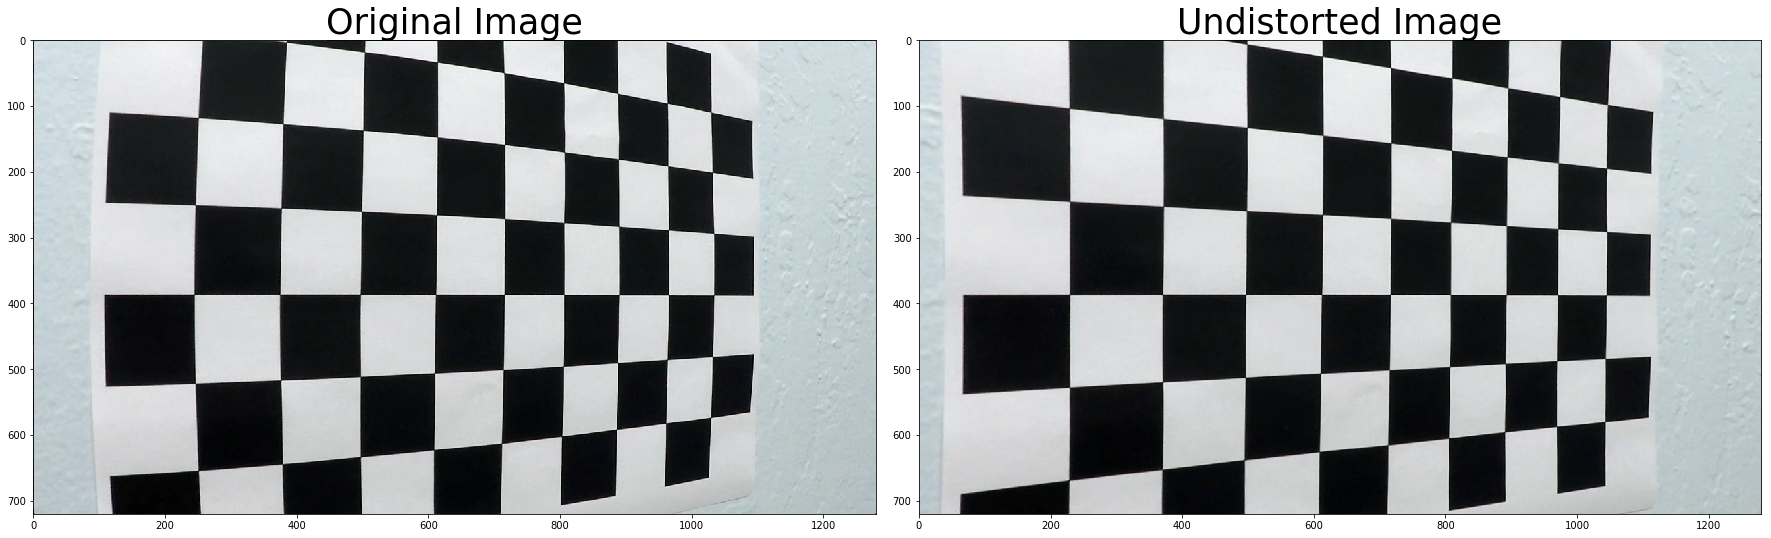

In [39]:
# Visualizing before and after of Undistortion on some chessboard images
for i in range(13,16):
    
    img = cv2.imread(images[i])
    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    PlotComparisonView(img, undistorted_img, 'Undistorted')

## Then, I'll Apply a distortion correction to raw images

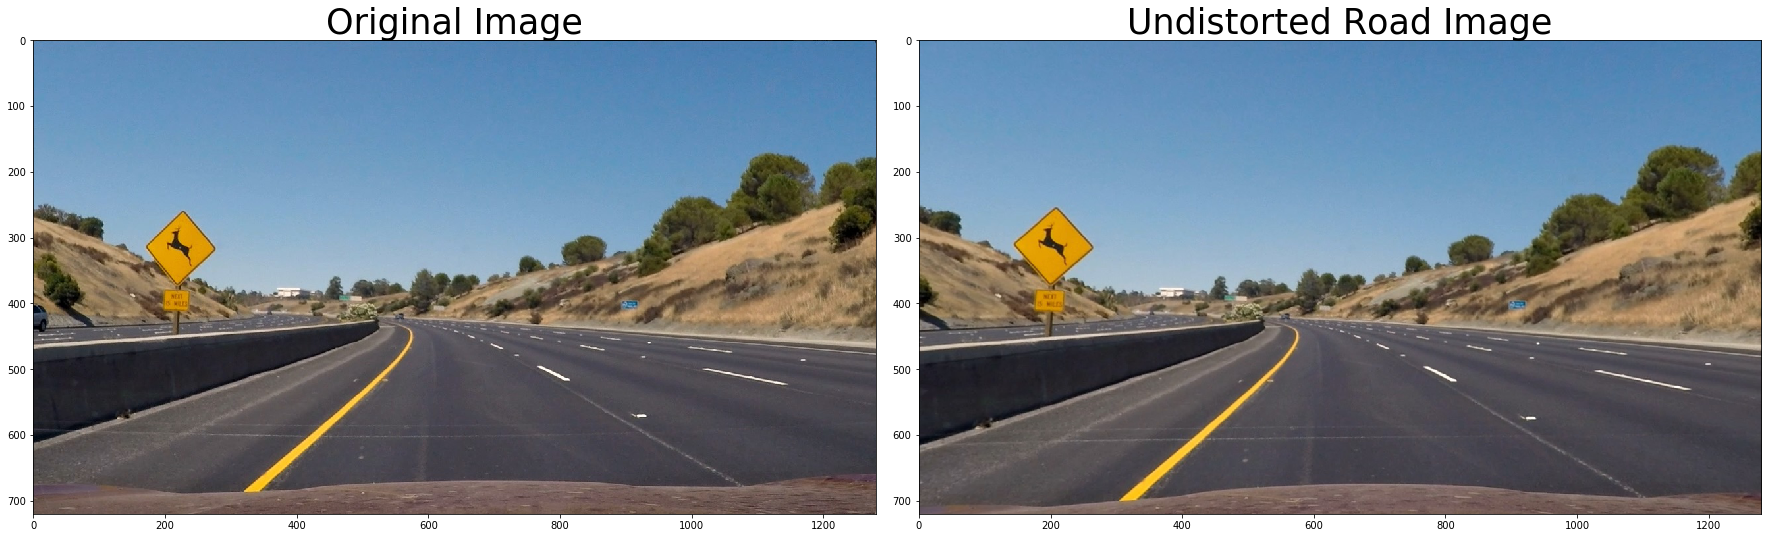

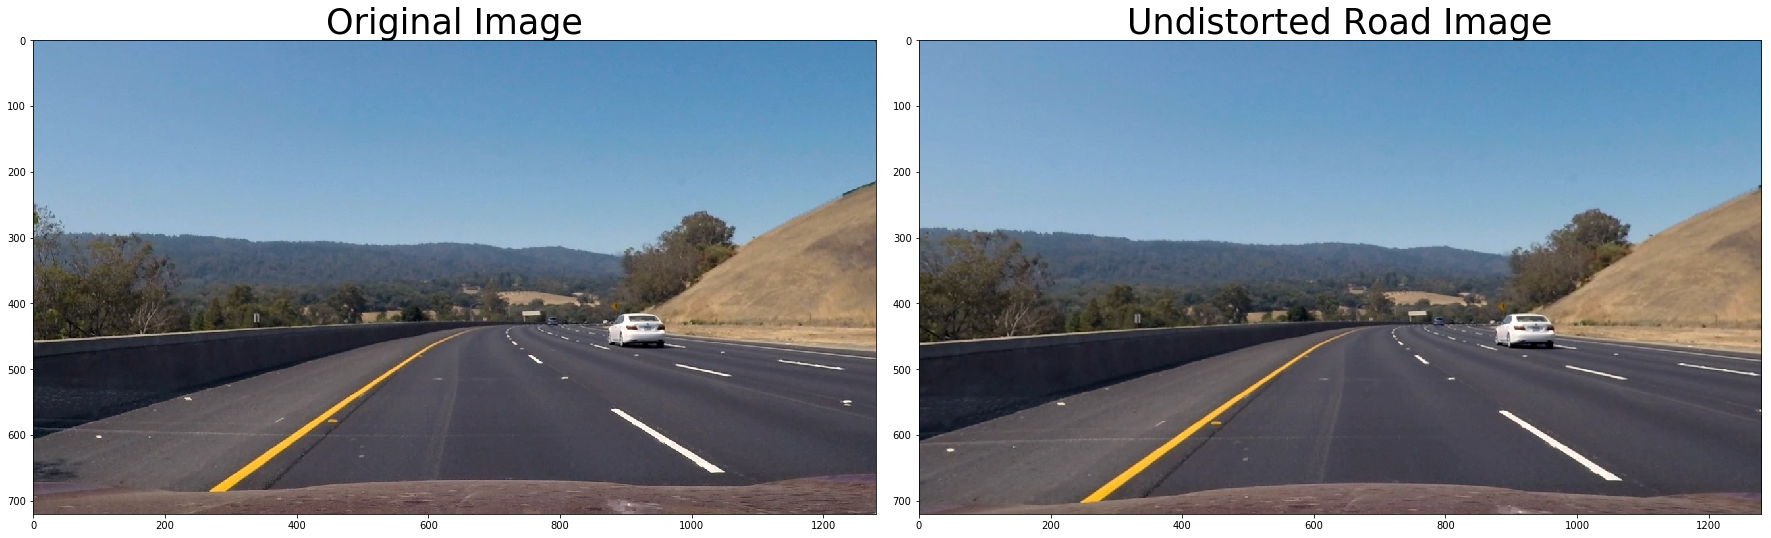

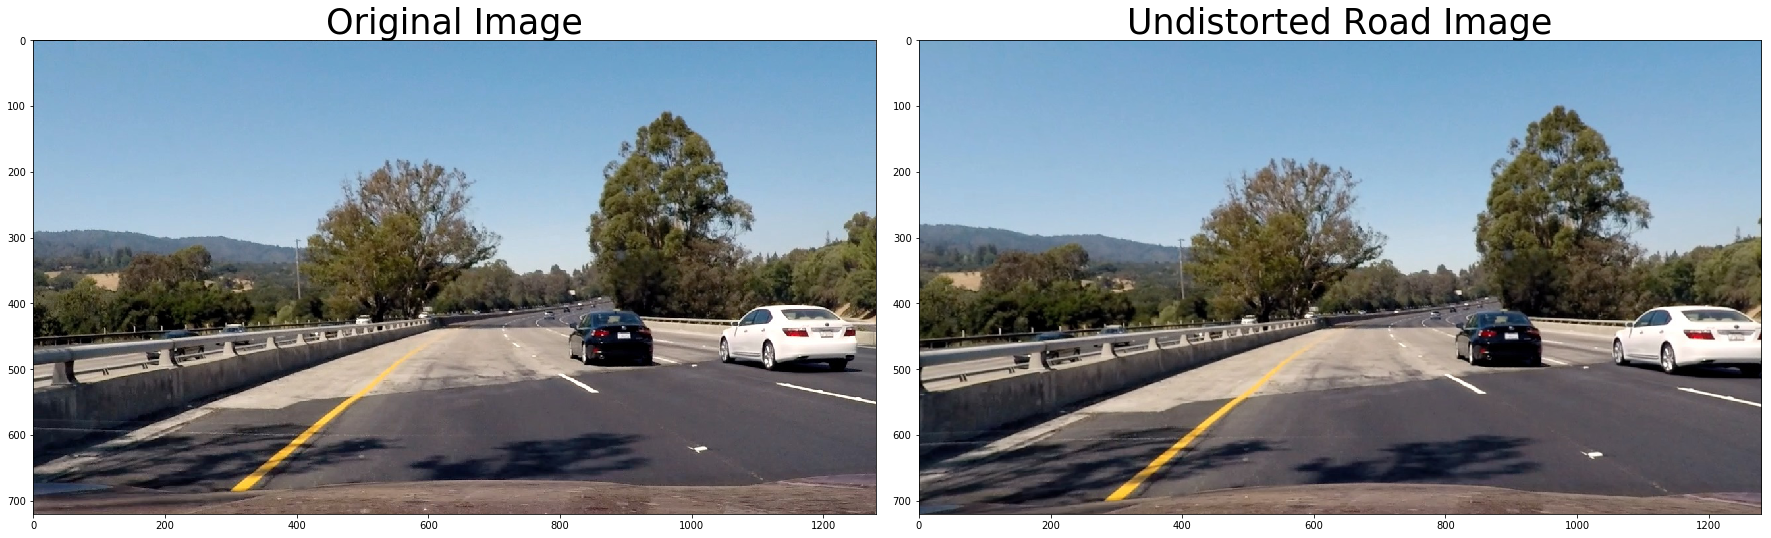

In [50]:
import matplotlib.image as mpimg

# Visualizing before and after of Undistortion on real world application image
test_images = glob.glob('test_images/test*.jpg')

for i in range(1,4):
    img = mpimg.imread(test_images[i])
    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    PlotComparisonView(img, undistorted_img, 'Undistorted Road')

## I'll Use color transforms, gradients, etc., to create a thresholded binary image